In [1]:
import pandas as pd

In [3]:
draft_14 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2014_draft_class.csv")
draft_15 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2015_draft_class.csv")
draft_16 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2016_draft_class.csv")
draft_17 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2017_draft_class.csv")
draft_18 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2018_draft_class.csv")
draft_19 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2019_draft_class.csv")
draft_20 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2020_draft_class.csv")
draft_21 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2021_draft_class.csv")
draft_22 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2022_draft_class.csv")
draft_23 = pd.read_csv(r"C:\da12\projects\capstone\capstone_DA12_NBA\notebooks\2023_draft_class.csv")

In [5]:
rookies_eff = pd.concat([draft_14,draft_15,draft_16,draft_17,draft_18,draft_19,draft_20,draft_21,draft_22,draft_23])

In [7]:
rookies_eff.head()

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,...,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,Andrew Wiggins,1,CLE,2014,82.0,36.2,6.1,13.9,4.3,5.7,...,2.1,1.0,0.6,2.2,2.3,16.9,29.1,-1.5,2.8,11.5
1,Jabari Parker,2,MIL,2014,25.0,29.5,5.2,10.5,1.8,2.6,...,1.7,1.2,0.2,1.9,1.7,12.3,13.8,-0.8,2.5,12.6
2,Joel Embiid,3,PHI,2014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.5,7.0,31.4,NaN
3,Aaron Gordon,4,ORL,2014,47.0,17.0,2.0,4.4,0.9,1.3,...,0.7,0.4,0.5,0.8,1.8,5.2,42.6,0.3,11.3,9.5
4,Dante Exum,5,UTA,2014,82.0,22.2,1.8,5.1,0.2,0.4,...,2.4,0.5,0.2,1.4,1.8,4.8,5.9,-2.8,-1.2,4.0


In [11]:
# rookies_eff = rookies_eff.dropna()
# rookies_eff

In [6]:
# rookies_2017 = rookies_eff[rookies_eff['YEAR'] == 2017]
# rookies_2017

In [7]:
# rookies_eff.to_csv('rookie_eff.csv', index=False)

In [9]:
# brk = rookies_eff[rookies_eff['TEAM'] == 'BRK']
# brk

In [21]:
nba_teams = rookies_eff['TEAM'].unique()
nba_teams = pd.DataFrame(nba_teams, columns=['TEAM'])
nba_teams

,TEAM
0,CLE
1,MIL
2,PHI
3,ORL
4,UTA
5,BOS
6,LAL
7,SAC
8,CHO
9,DEN


In [53]:
lottery = rookies_eff[rookies_eff['PICK'] <= 14]
# lottery.head(15)
lottery_counts = lottery['TEAM'].value_counts().reset_index()
# lottery_counts = lottery_counts.rename(columns={'index':'TEAM','TEAM':'LOTTERY PICKS'})
lottery_counts
# lottery_counts.to_csv('lottery_counts.csv', index=False)

,TEAM,count
0,ORL,11
1,CHO,9
2,SAC,9
3,PHO,8
4,NOP,7
5,DET,6
6,NYK,6
7,MIN,6
8,CLE,6
9,PHI,6


In [59]:
lottery = pd.merge(nba_teams,lottery_counts,how='left',on='TEAM')
lottery.fillna(0, inplace=True)
lottery['count'].astype(int)
lottery = lottery.rename(columns={'count':'LOTTERY PICKS'})
lottery
lottery.to_csv('lottery_counts.csv', index=False)

In [65]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [67]:
drop_injuries = rookies_eff.dropna()
drop_injuries.head()

,PLAYER,PICK,TEAM,YEAR,G,MP,FG,FGA,FT,FTA,...,AST,STL,BLK,TOV,PF,PTS,ADVANCED_WS,ADVANCED_BPM,ADVANCED_VORP,PER
0,Andrew Wiggins,1,CLE,2014,82.0,36.2,6.1,13.9,4.3,5.7,...,2.1,1.0,0.6,2.2,2.3,16.9,29.1,-1.5,2.8,11.5
1,Jabari Parker,2,MIL,2014,25.0,29.5,5.2,10.5,1.8,2.6,...,1.7,1.2,0.2,1.9,1.7,12.3,13.8,-0.8,2.5,12.6
3,Aaron Gordon,4,ORL,2014,47.0,17.0,2.0,4.4,0.9,1.3,...,0.7,0.4,0.5,0.8,1.8,5.2,42.6,0.3,11.3,9.5
4,Dante Exum,5,UTA,2014,82.0,22.2,1.8,5.1,0.2,0.4,...,2.4,0.5,0.2,1.4,1.8,4.8,5.9,-2.8,-1.2,4.0
5,Marcus Smart,6,BOS,2014,67.0,27.0,2.6,7.1,1.2,1.9,...,3.1,1.5,0.3,1.3,2.6,7.8,33.4,-0.3,7.6,9.3


Text(0.5, 0, 'Player Efficiency Rating (PER)')

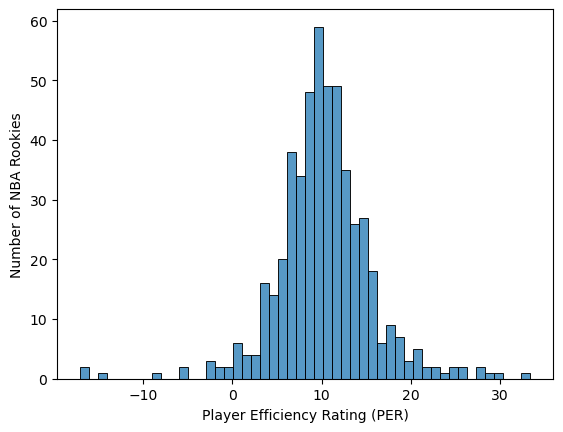

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=drop_injuries,x='PER', bins=50)
plt.ylabel('Number of NBA Rookies')
plt.xlabel('Player Efficiency Rating (PER)')

In [71]:
first = drop_injuries[drop_injuries['PICK'] <= 30]
second = drop_injuries[drop_injuries['PICK'] > 30]

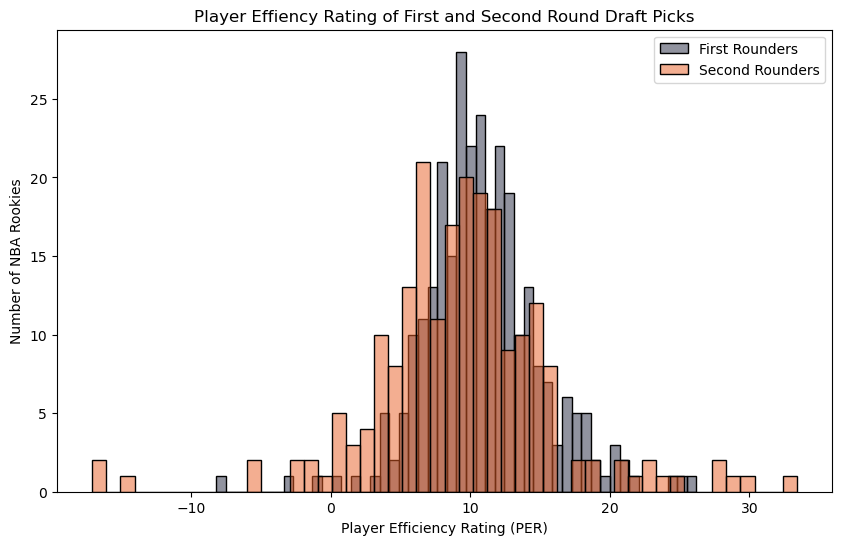

In [100]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the first histogram
sns.histplot(data=first, x='PER', bins=50, color = '#242841', alpha=0.5, label='First Rounders')

# Plot the second histogram
sns.histplot(data=second, x = 'PER', bins=50, color='#E95E24', alpha=0.5, label='Second Rounders')

# Add labels and legend
plt.ylabel('Number of NBA Rookies')
plt.xlabel('Player Efficiency Rating (PER)')
plt.title('Player Effiency Rating of First and Second Round Draft Picks')
plt.legend()

# Show the plot
plt.savefig(r'C:\da12\projects\capstone\capstone_DA12_NBA\first_second_round_comp.jpg')
plt.show()

In [26]:
below_avg = rookies_eff[rookies_eff['PER'] < 15]
pct = round((len(below_avg)/len(rookies_eff))*100, 2)
print(pct)

72.18
